# Unbanked Opportunities in West Africa

## Importing libraries and data

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

%matplotlib inline

fin_data = pd.read_csv('banking_data.csv')
print("Setup complete")

Setup complete


In [2]:
fin_data.head()

,Country,Year,Id,BankAccount,LocationType,CellphoneAccess,HouseholdSize,Age,Gender,RelationshipWithHead,MaritalStatus,EducationLevel,JobType
0,Ivory Coast,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Ivory Coast,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Ivory Coast,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Ivory Coast,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Ivory Coast,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


## Data Exploratory Analysis

In [3]:
print('Shape: {}\n'.format(fin_data.shape))
print(fin_data.dtypes)

Shape: (23524, 13)

Country                 object
Year                     int64
Id                      object
BankAccount             object
LocationType            object
CellphoneAccess         object
HouseholdSize            int64
Age                      int64
Gender                  object
RelationshipWithHead    object
MaritalStatus           object
EducationLevel          object
JobType                 object
dtype: object


In [6]:
fin_data.describe()

,Year,HouseholdSize,Age
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


### Visualizations

### Age groups distribution

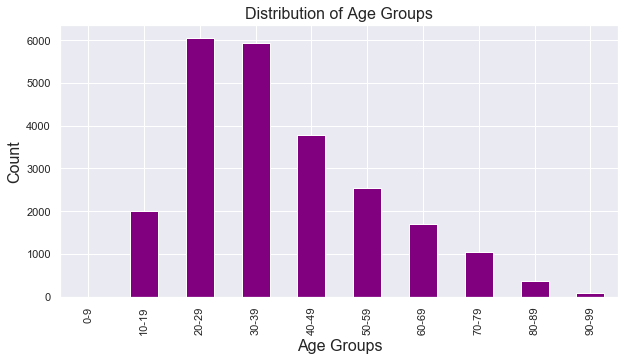

In [7]:
ranges= ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']

fin_data.groupby(pd.cut(fin_data['Age'], range(0, 101, 10), right=False, labels=ranges)).size().plot(kind='bar', stacked=True, color='purple', figsize= (10,5))

plt.title("Distribution of Age Groups",fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xlabel('Age Groups', fontsize=16);

### Gender distribution

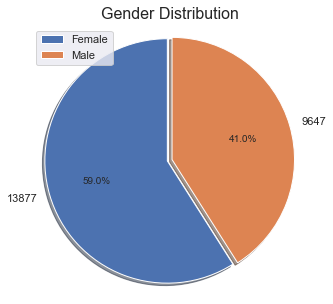

In [8]:
fig, ax = plt.subplots(figsize=(5,5))

gender_count = fin_data['Gender'].value_counts()

ax.pie(gender_count, explode=(0, 0.04), labels=gender_count, autopct='%1.1f%%', shadow=True, startangle=90)
ax.set_title('Gender Distribution', fontsize=16)
ax.legend(gender_count.keys().tolist())
ax.axis('equal')

plt.show()

In [ ]:
pd.crosstab(df.bank_account,df.location_type, margins=True)

### Region distribution

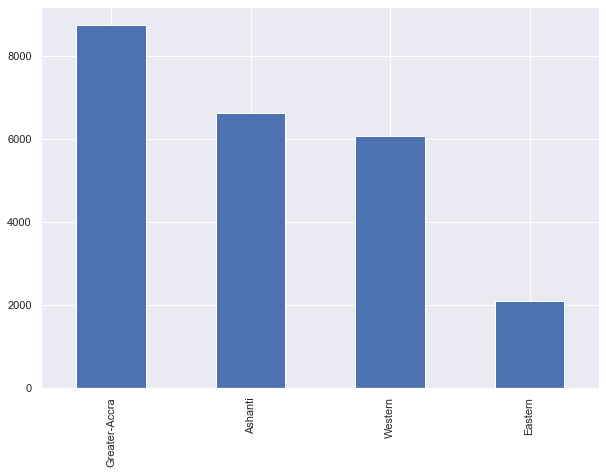

In [62]:
fin_data['Region'].value_counts().plot(kind='bar', figsize=(10,7))

In [12]:
pd.crosstab(fin_data.BankAccount,fin_data.LocationType, margins=True)

LocationType,Rural,Urban,All
BankAccount,,,
No,12672,7540,20212
Yes,1671,1641,3312
All,14343,9181,23524


## Modelling

### Importing Library

In [13]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

#### Label encoding with categorical columns

In [14]:
fin_data['LocationType'] = label.fit_transform(fin_data['LocationType'])
fin_data['CellphoneAccess'] = label.fit_transform(fin_data['CellphoneAccess'])
fin_data['Gender'] = label.fit_transform(fin_data['Gender'])

In [6]:
fin_data.head()

,Country,Year,Id,BankAccount,LocationType,CellphoneAccess,HouseholdSize,Age,Gender,RelationshipWithHead,MaritalStatus,EducationLevel,JobType
0,Ivory Coast,2018,uniqueid_1,Yes,0,1,3,24,0,Spouse,Married/Living together,Secondary education,Self employed
1,Ivory Coast,2018,uniqueid_2,No,0,0,5,70,0,Head of Household,Widowed,No formal education,Government Dependent
2,Ivory Coast,2018,uniqueid_3,Yes,1,1,5,26,1,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Ivory Coast,2018,uniqueid_4,No,0,1,5,34,0,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Ivory Coast,2018,uniqueid_5,No,1,0,8,26,1,Child,Single/Never Married,Primary education,Informally employed


### Mapping Yes and No values of bank account with 0 and 1 

In [15]:
fin_data['BankAccount'] = fin_data['BankAccount'].map({'No':0,'Yes':1})

In [21]:
fin_data.head()

,Country,Year,Id,BankAccount,LocationType,CellphoneAccess,HouseholdSize,Age,Gender,RelationshipWithHead,MaritalStatus,EducationLevel,JobType
0,Ivory Coast,2018,uniqueid_1,1,0,1,3,24,0,Spouse,Married/Living together,Secondary education,Self employed
1,Ivory Coast,2018,uniqueid_2,0,0,0,5,70,0,Head of Household,Widowed,No formal education,Government Dependent
2,Ivory Coast,2018,uniqueid_3,1,1,1,5,26,1,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Ivory Coast,2018,uniqueid_4,0,0,1,5,34,0,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Ivory Coast,2018,uniqueid_5,0,1,0,8,26,1,Child,Single/Never Married,Primary education,Informally employed


### Visualizing correlation between columns

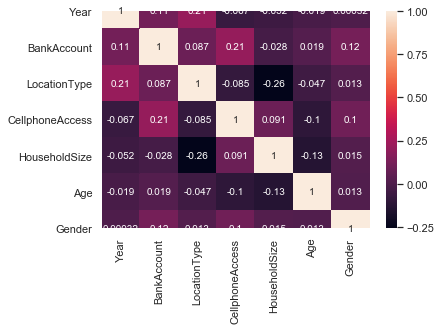

In [26]:
sns.heatmap(fin_data.corr(), annot=True)

### Correlation between the bank account and the numerical columns

In [38]:
fin_data.corr()['BankAccount'].sort_values()

HouseholdSize     -0.028326
Age                0.019429
LocationType       0.087288
Year               0.112318
Gender             0.117234
CellphoneAccess    0.209669
BankAccount        1.000000
Name: BankAccount, dtype: float64

### Converting categorical columns to numeric using the 'dummies' function

In [153]:
dummies = pd.get_dummies(fin_data,columns=['EducationLevel','JobType'])
dummies.head()

,Country,Year,Id,BankAccount,LocationType,CellphoneAccess,HouseholdSize,Age,Gender,RelationshipWithHead,...,JobType_Dont Know/Refuse to answer,JobType_Farming and Fishing,JobType_Formally employed Government,JobType_Formally employed Private,JobType_Government Dependent,JobType_Informally employed,JobType_No Income,JobType_Other Income,JobType_Remittance Dependent,JobType_Self employed
0,Ivory Coast,2018,uniqueid_1,1,0,1,3,24,0,Spouse,...,0,0,0,0,0,0,0,0,0,1
1,Ivory Coast,2018,uniqueid_2,0,0,0,5,70,0,Head of Household,...,0,0,0,0,1,0,0,0,0,0
2,Ivory Coast,2018,uniqueid_3,1,1,1,5,26,1,Other relative,...,0,0,0,0,0,0,0,0,0,1
3,Ivory Coast,2018,uniqueid_4,0,0,1,5,34,0,Head of Household,...,0,0,0,1,0,0,0,0,0,0
4,Ivory Coast,2018,uniqueid_5,0,1,0,8,26,1,Child,...,0,0,0,0,0,1,0,0,0,0


### Separating features and labels

In [51]:
# feature = ['Region', 'LocationType', 'CellphoneAccess', 'HouseholdSize', 'Age', 'Gender', 'RelationshipWithHead', 'MaritalStatus', 'EducationLevel', 'JobType']
# label = 'BankAccount'

### Assigning the target label and features

In [120]:
y = dummies[['BankAccount']]
X = dummies.drop(columns=['BankAccount','Country','Year','Id','RelationshipWithHead','MaritalStatus'], axis=1)

X.shape

(23524, 21)

### Using over sampling on the imbalanced data

In [61]:
from imblearn.over_sampling import SMOTE

In [135]:
sm = SMOTE()
X_res,y_res = sm.fit_resample(X, y.values.reshape(-1,))
y_res = pd.DataFrame({"BankAccount": y_res})

C:\Users\Kingsley\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [136]:
print(X_res.shape, y_res.shape)

(40424, 21) (40424, 1)


In [82]:
from sklearn.model_selection import train_test_split

In [130]:
#spliting dataset as train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

In [131]:
X_train.shape,X_test.shape

((28296, 21), (12128, 21))

### Random Forest Classifier

In [132]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=50)

In [133]:
model.fit(X_train,y_train.values.ravel())

RandomForestClassifier(n_estimators=50)

In [134]:
model.score(X_test,y_test)

0.8775560686015831

In [137]:
y_predict = model.predict(X_test)

In [138]:
#importing confusion matrix library
from sklearn.metrics import confusion_matrix

In [139]:
confusion_matrix(y_test,y_predict)

array([[5208,  848],
       [ 637, 5435]], dtype=int64)

In [140]:
#bank account(y) prediction of split test data using Random Forest model
y_predict

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

### Logistic Regression

In [143]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()

In [144]:
lr_model.fit(X_train,y_train.values.ravel())

C:\Users\Kingsley\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [145]:
lr_model.score(X_test,y_test)

0.8001319261213721

In [146]:
lr_y_predict = lr_model.predict(X_test)

In [147]:
confusion_matrix(y_test,lr_y_predict)

array([[5220,  836],
       [1588, 4484]], dtype=int64)

In [148]:
#bank account(y) prediction of split test data using Logistic Regression
lr_y_predict

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

### Sector Vector Classifier

In [149]:
from sklearn.svm import SVC

In [150]:
svc_model = SVC(C=5)
svc_model.fit(X_train,y_train)

C:\Users\Kingsley\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(C=5)

In [151]:
svc_model.score(X_test,y_test)

0.7838885224274407

*Model with the best accuracy was selected thus Random Forest*

### Prediction Function

In [154]:
# prediction function
def predict_bank_acount(LocationType, CellphoneAccess, HouseholdSize, Age, Gender, EducationLevel, JobType):
    
    
    input = [{
        'LocationType' : LocationType,
        'CellphoneAccess' : CellphoneAccess,
        'HouseholdSize' : HouseholdSize,
        'Age' : Age,
        'Gender' : Gender,
        
        'EducationLevel_No formal education' : 1 if EducationLevel == 'No formal education' else 0,
        'EducationLevel_Other/Dont know/RTA' : 1 if EducationLevel == 'Other/Dont know/RTA' else 0,
        'EducationLevel_Primary education' : 1 if EducationLevel == 'Primary education' else 0,
        'EducationLevel_Secondary education' : 1 if EducationLevel == 'Secondary education' else 0,
        'EducationLevel_Tertiary education' : 1 if EducationLevel == 'Tertiary education' else 0,
        'EducationLevel_Vocational/Specialised training' : 1 if EducationLevel == 'Vocational/Specialised training' else 0,
        
        'JobType_Dont Know/Refuse to answer' : 1 if JobType == 'Dont Know/Refuse to answer' else 0,
        'JobType_Farming and Fishing' : 1 if JobType == 'Farming and Fishing' else 0,
        'JobType_Formally employed Government' : 1 if JobType == 'Formally employed Government' else 0,
        'JobType_Formally employed Private' : 1 if JobType == 'Formally employed Private' else 0,
        'JobType_Government Dependent' : 1 if JobType == 'Government Dependent' else 0,
        'JobType_Informally employed' : 1 if JobType == 'Informally employed' else 0,
        'JobType_No Income' :1 if JobType == 'No Income' else 0,
        'JobType_Other Income' : 1 if JobType == 'Other Income' else 0,
        'JobType_Remittance Dependent' : 1 if JobType == 'Remittance Dependent' else 0,
        'JobType_Self employed' : 1 if JobType == 'Self employed' else 0 }]
  
    
    
    return model.predict(pd.DataFrame(input))[0]
    

In [155]:
#predict 0 as No bank account and 1 as Bank Account
predict_bank_acount(1,1,3,30,1,'Secondary education','Formally employed Government')

1

In [156]:
import pickle

In [158]:
#save model to a file
with open('unbanked_opportunities_in_west_africa_model_pickle', 'wb') as f:
    pickle.dump(model,f)